In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
import metapredict as meta
import protfasta
from sparrow import Protein

In [2]:
seqs = protfasta.read_fasta('data/sequences.fasta')

In [3]:
color_res = {}
color_res['A'] = 'grey'
color_res['C'] = 'yellow'
color_res['D'] = 'red'
color_res['E'] = 'red'
color_res['F'] = 'orange'
color_res['G'] = 'green'
color_res['H'] = 'green'
color_res['I'] = 'black'
color_res['K'] = 'blue'
color_res['L'] = 'black'
color_res['M'] = 'black'
color_res['N'] = 'green'
color_res['P'] = 'purple'
color_res['Q'] = 'green'
color_res['R'] = 'blue'
color_res['S'] = 'green'
color_res['T'] = 'green'
color_res['V'] = 'black'
color_res['W'] = 'orange'
color_res['Y'] = 'orange'


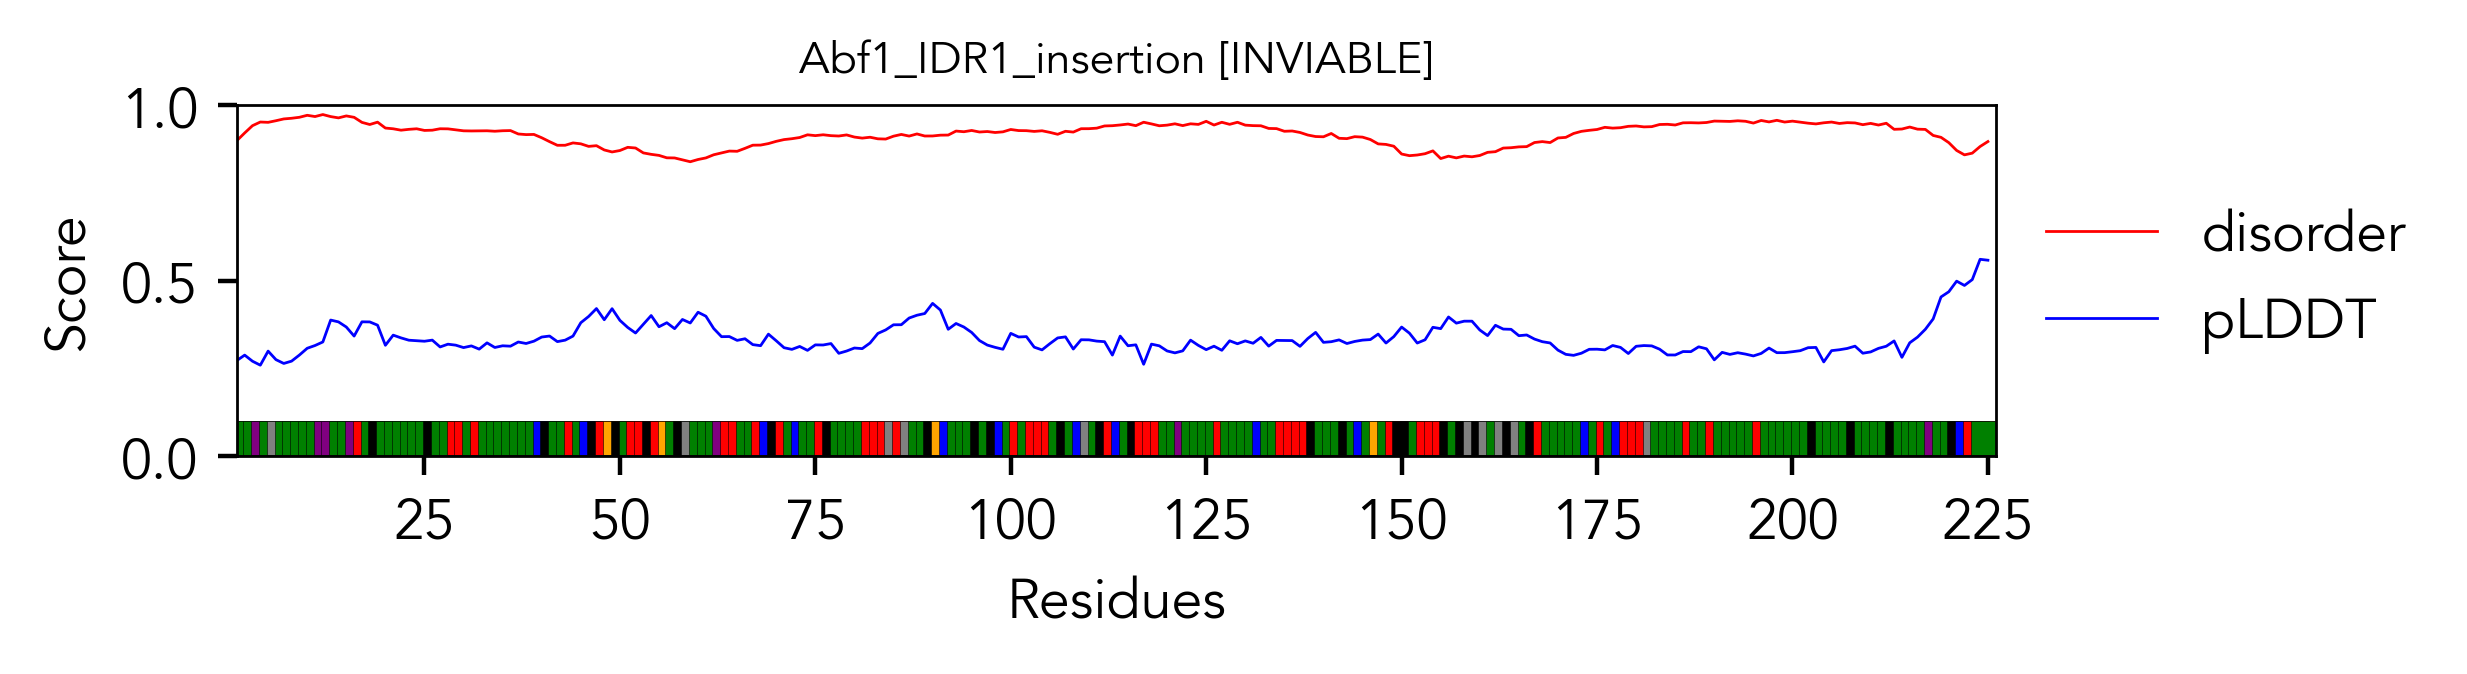

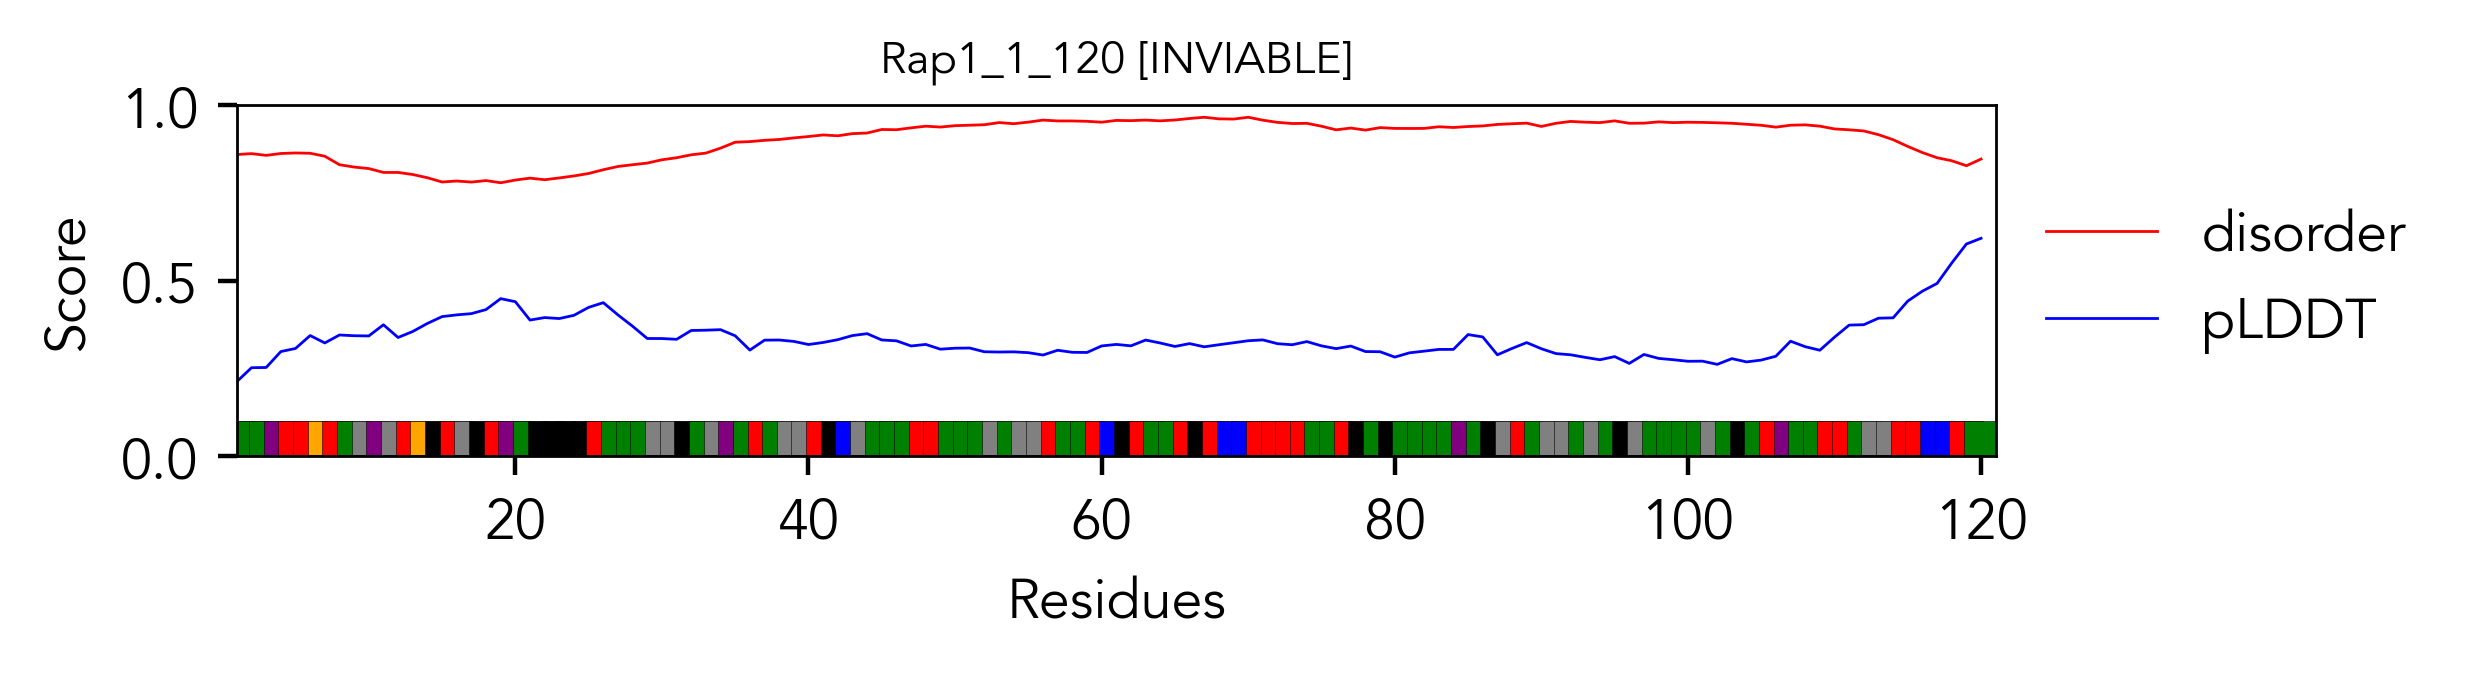

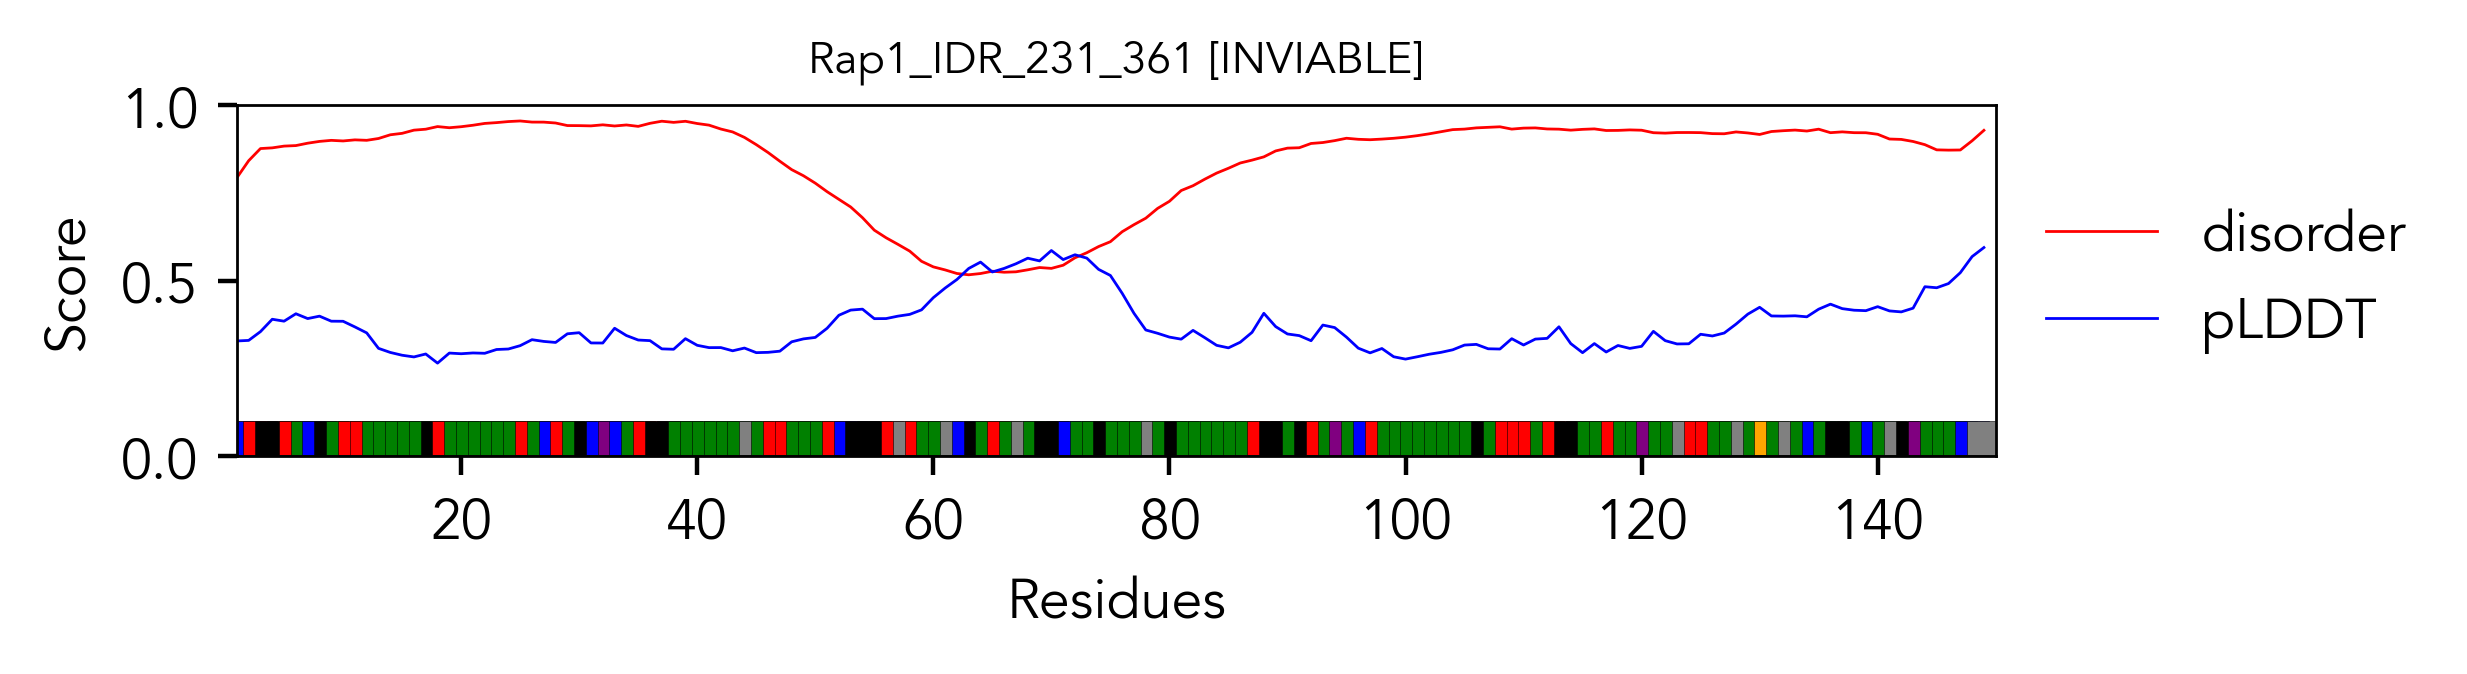

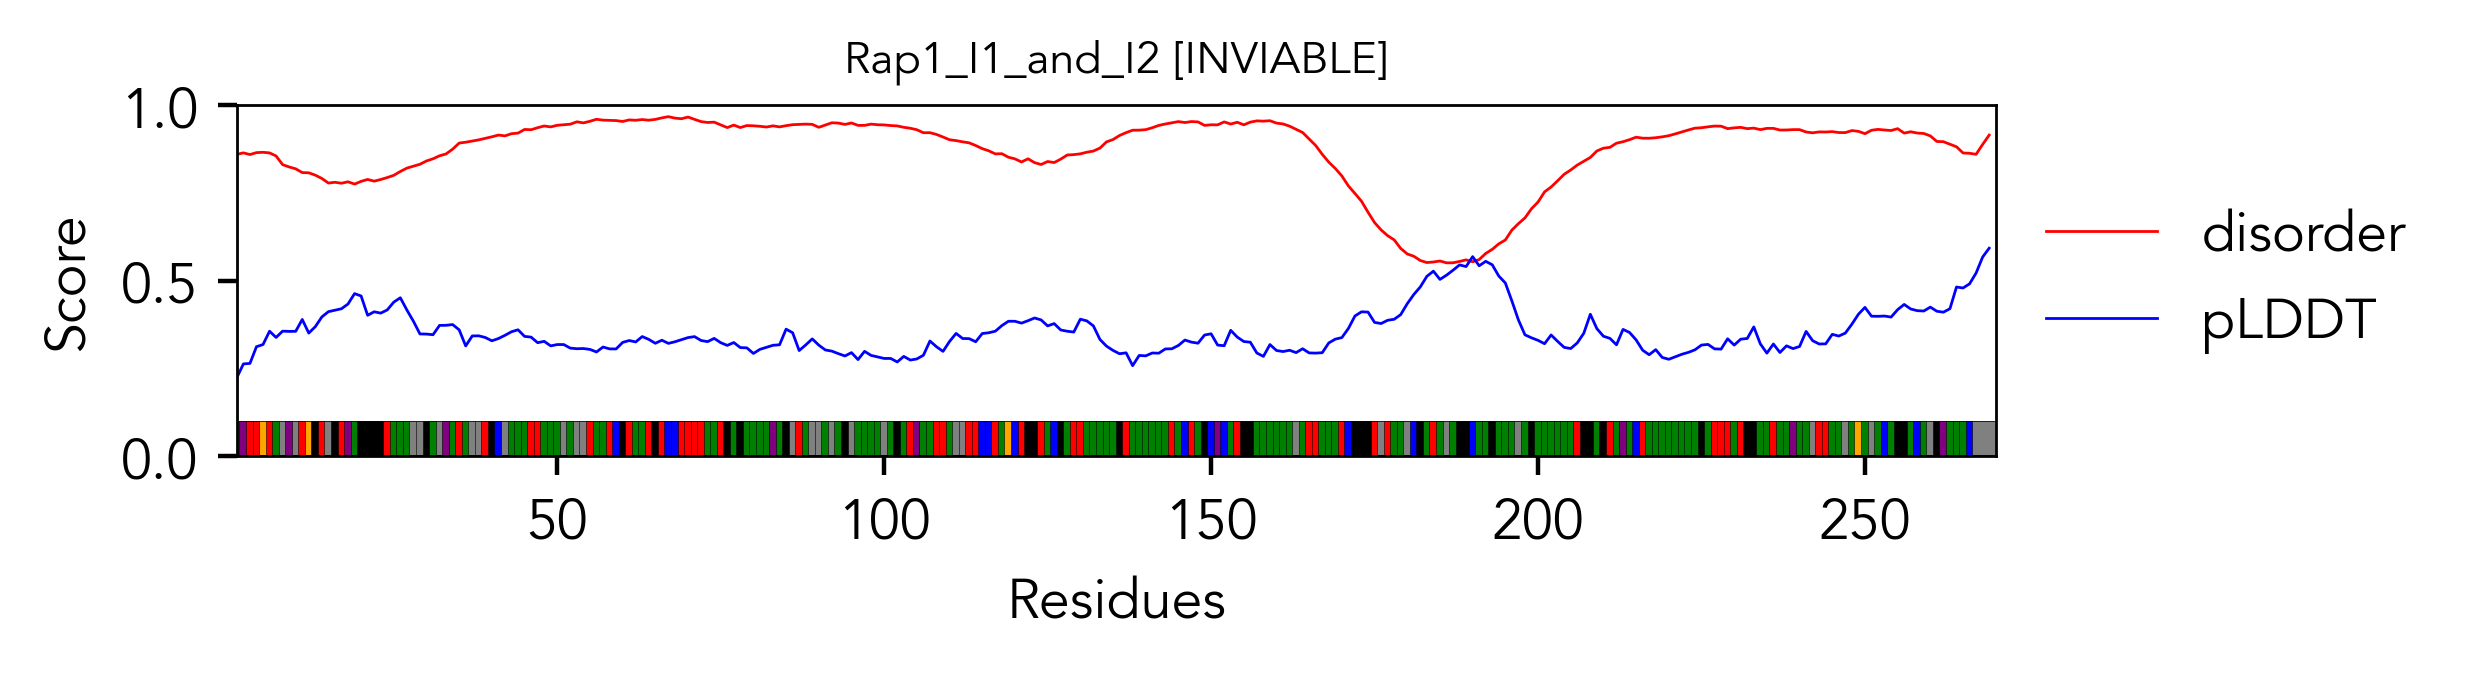

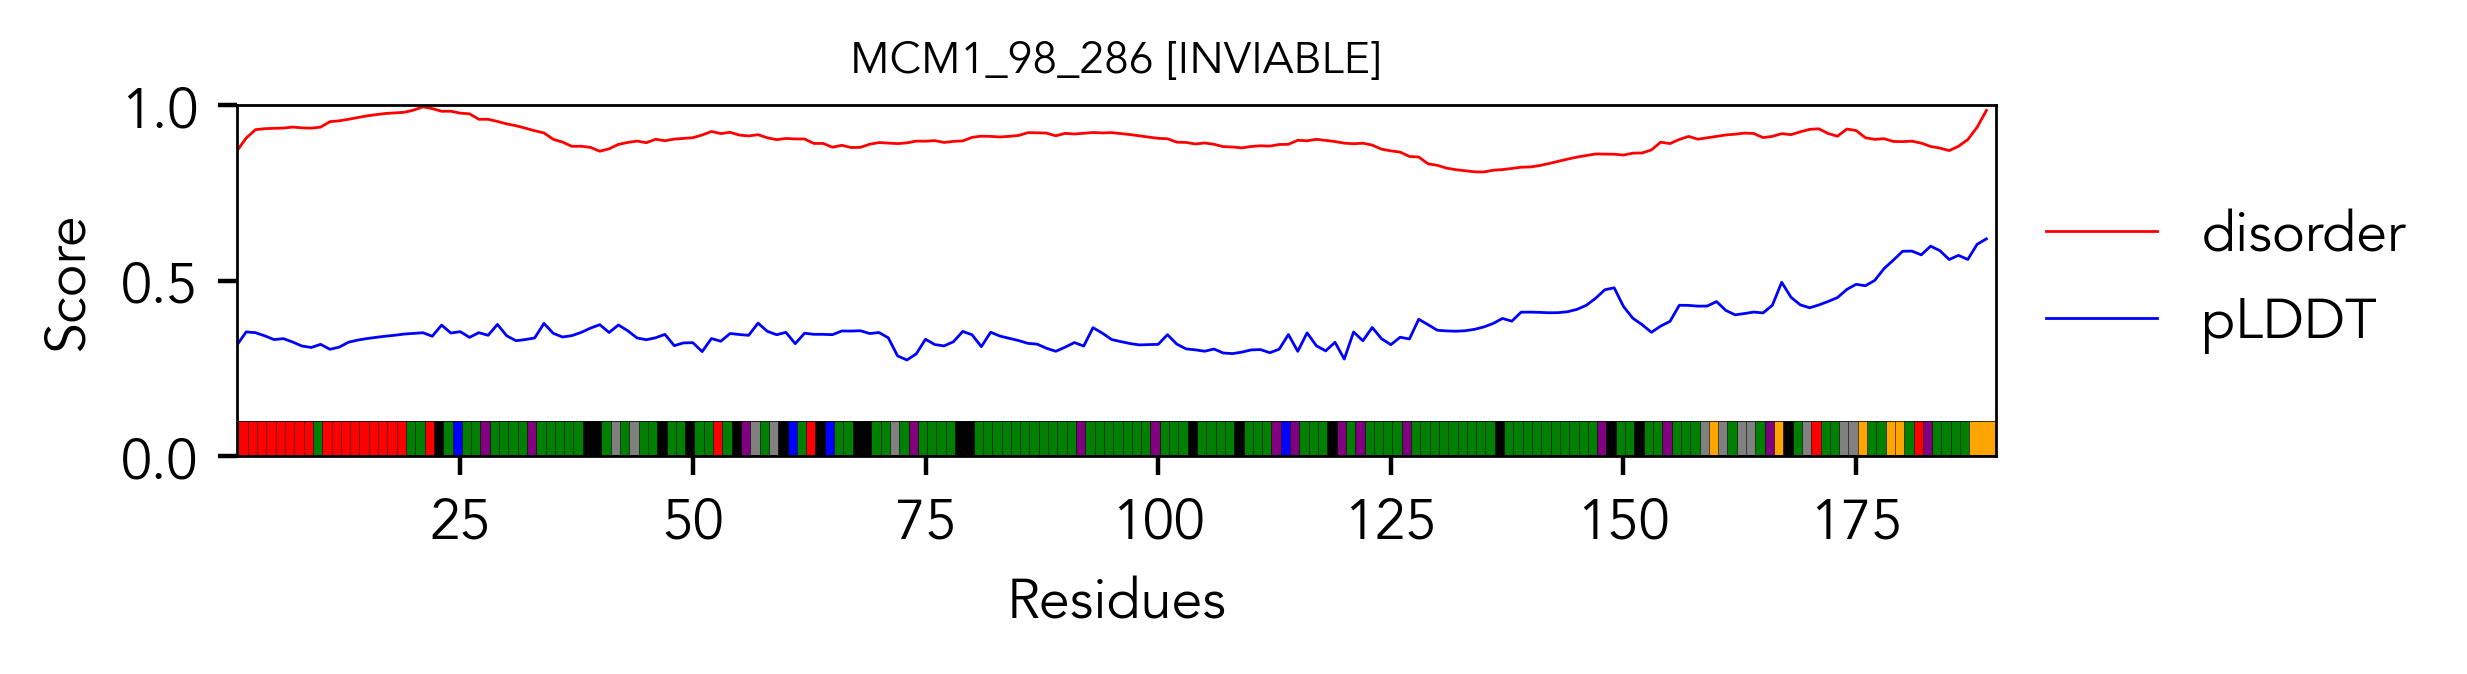

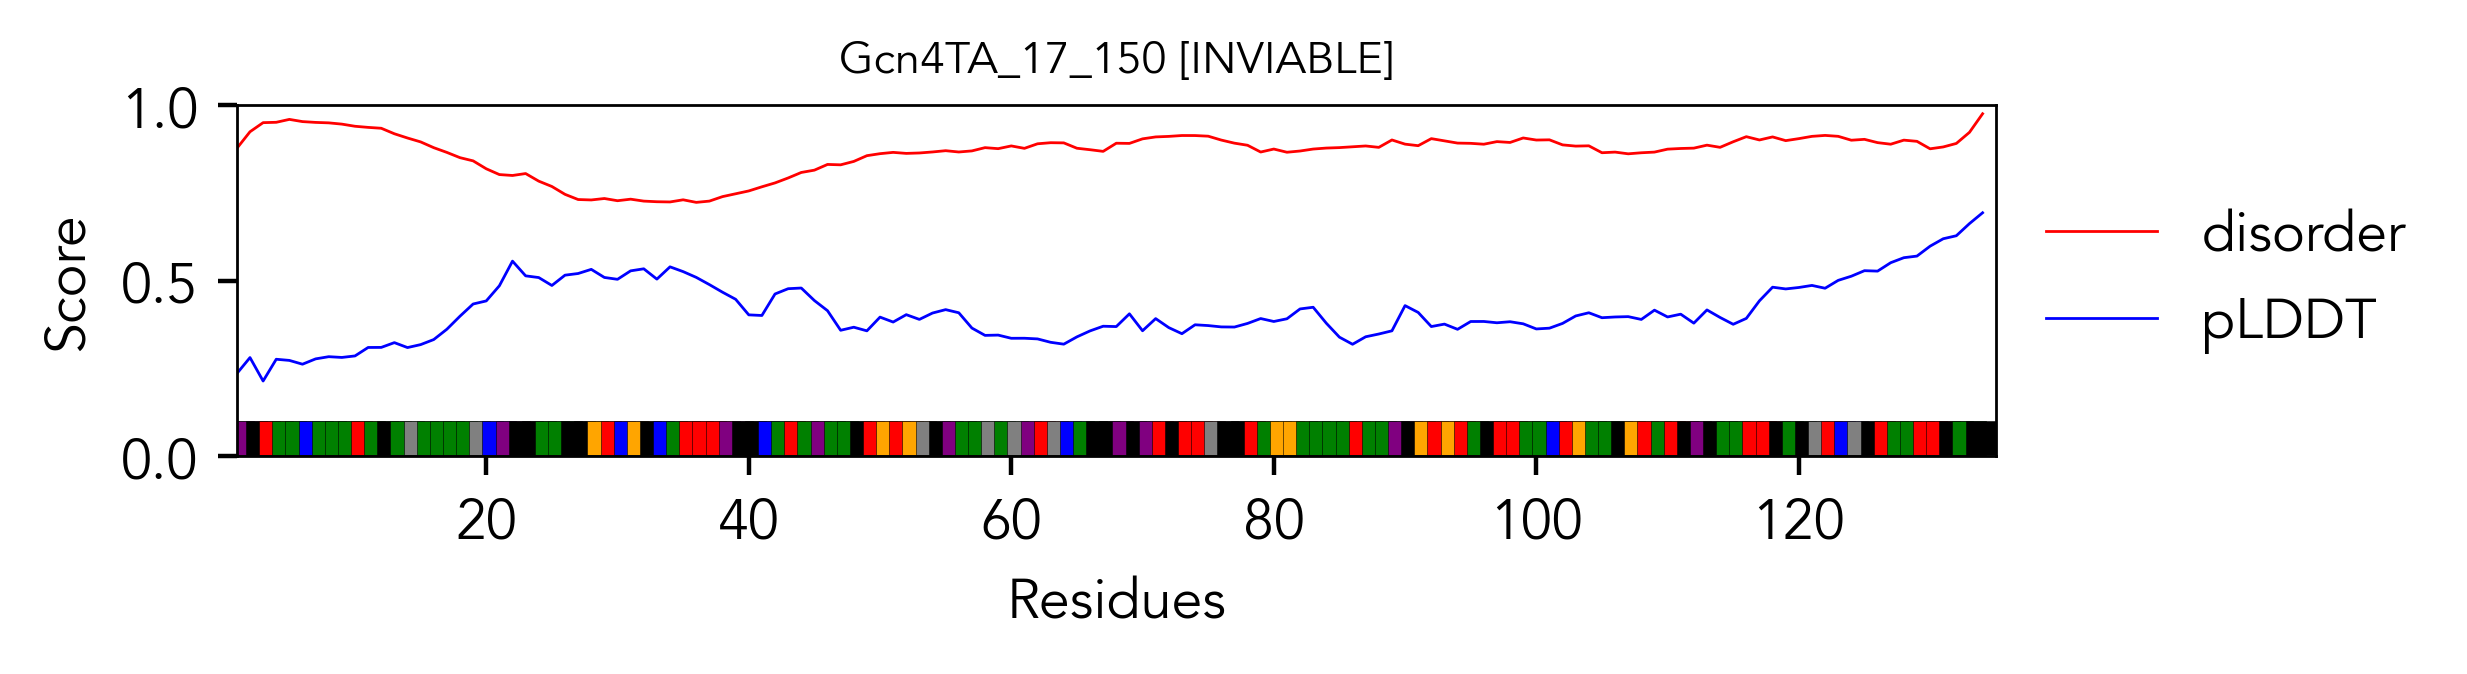

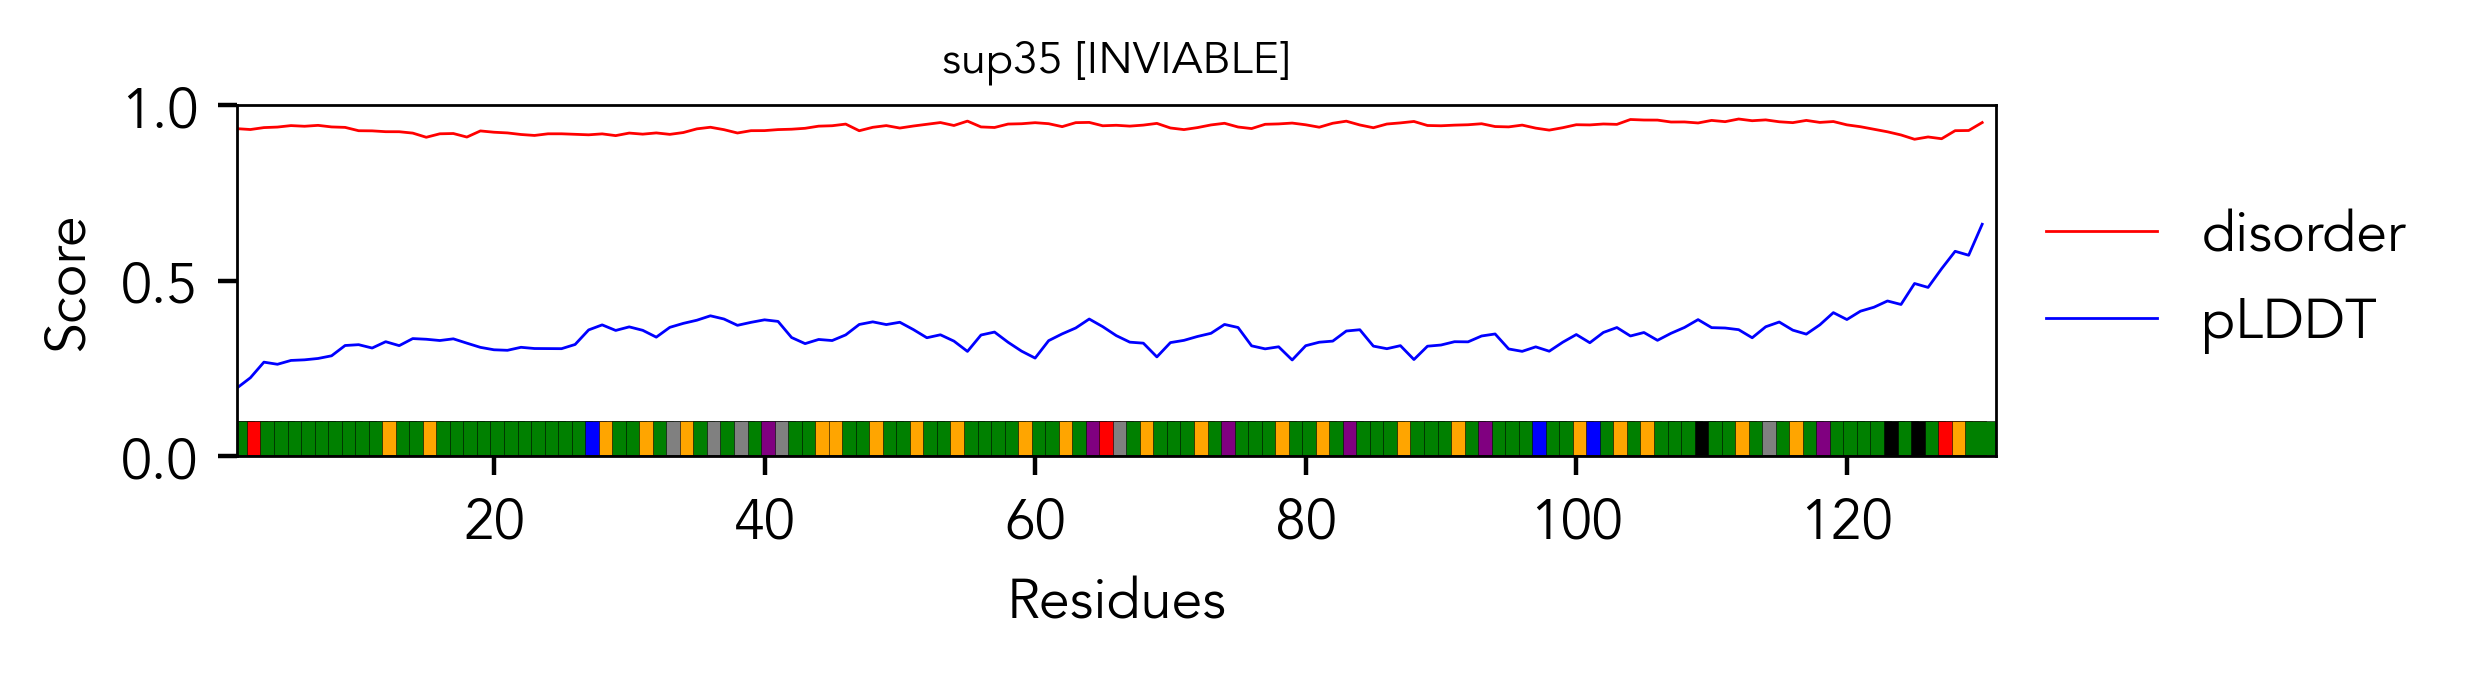

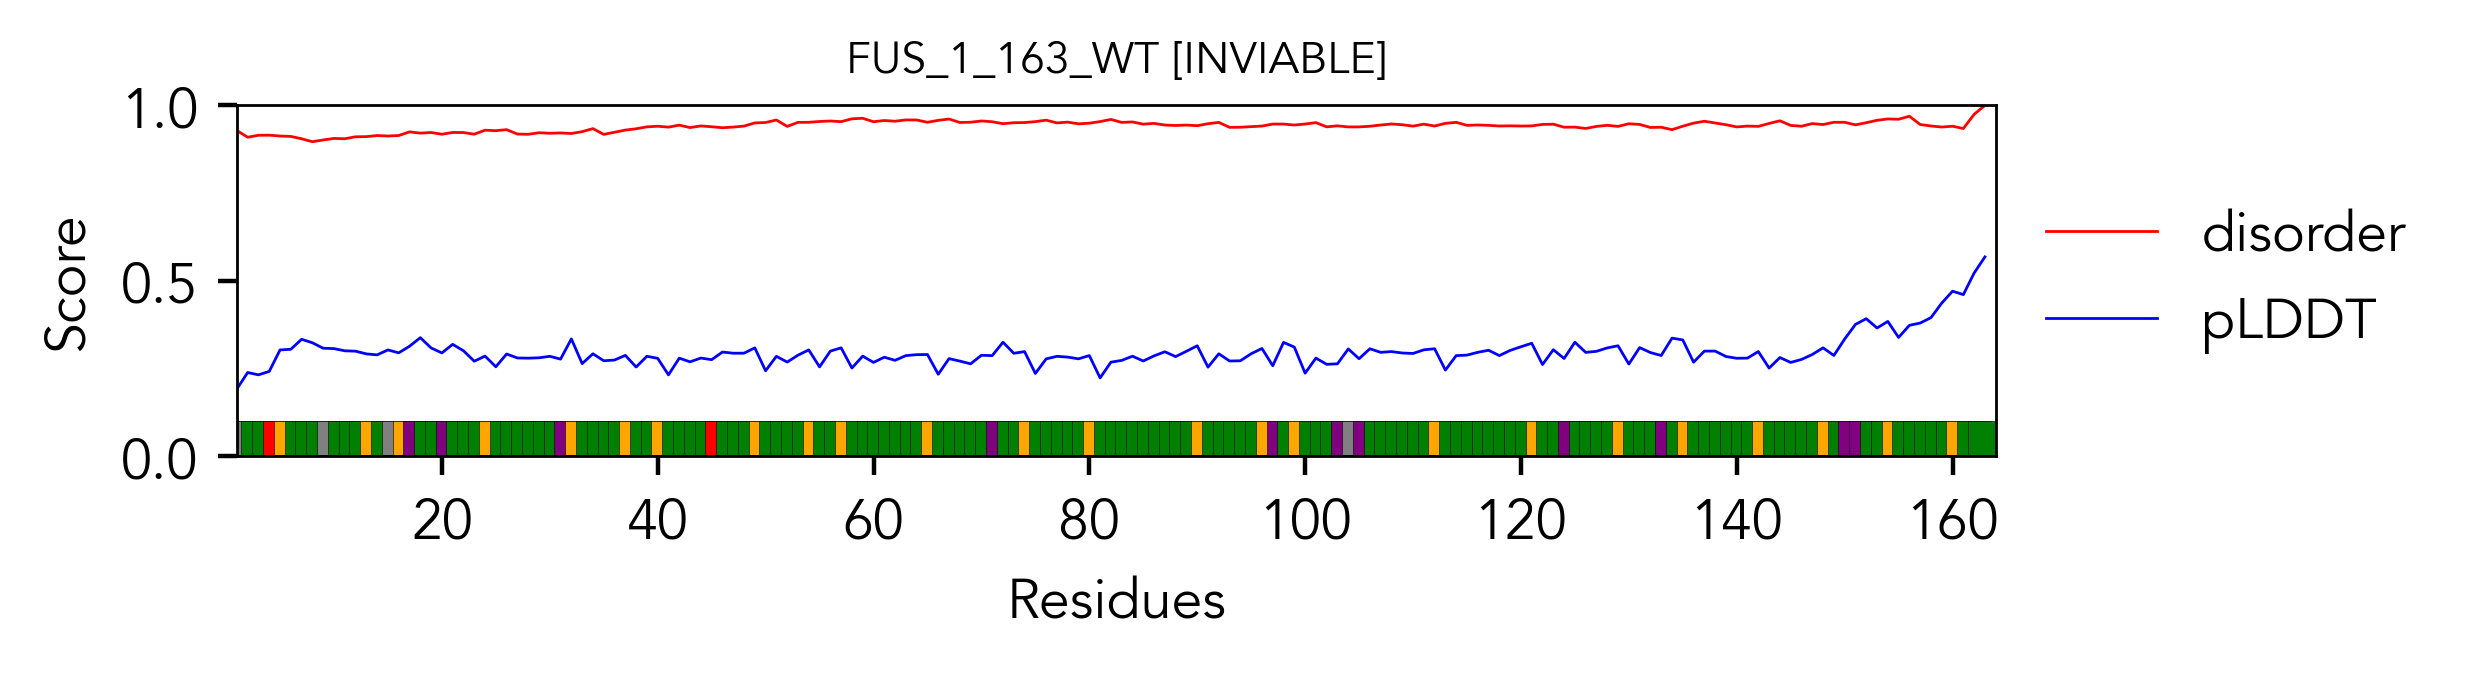

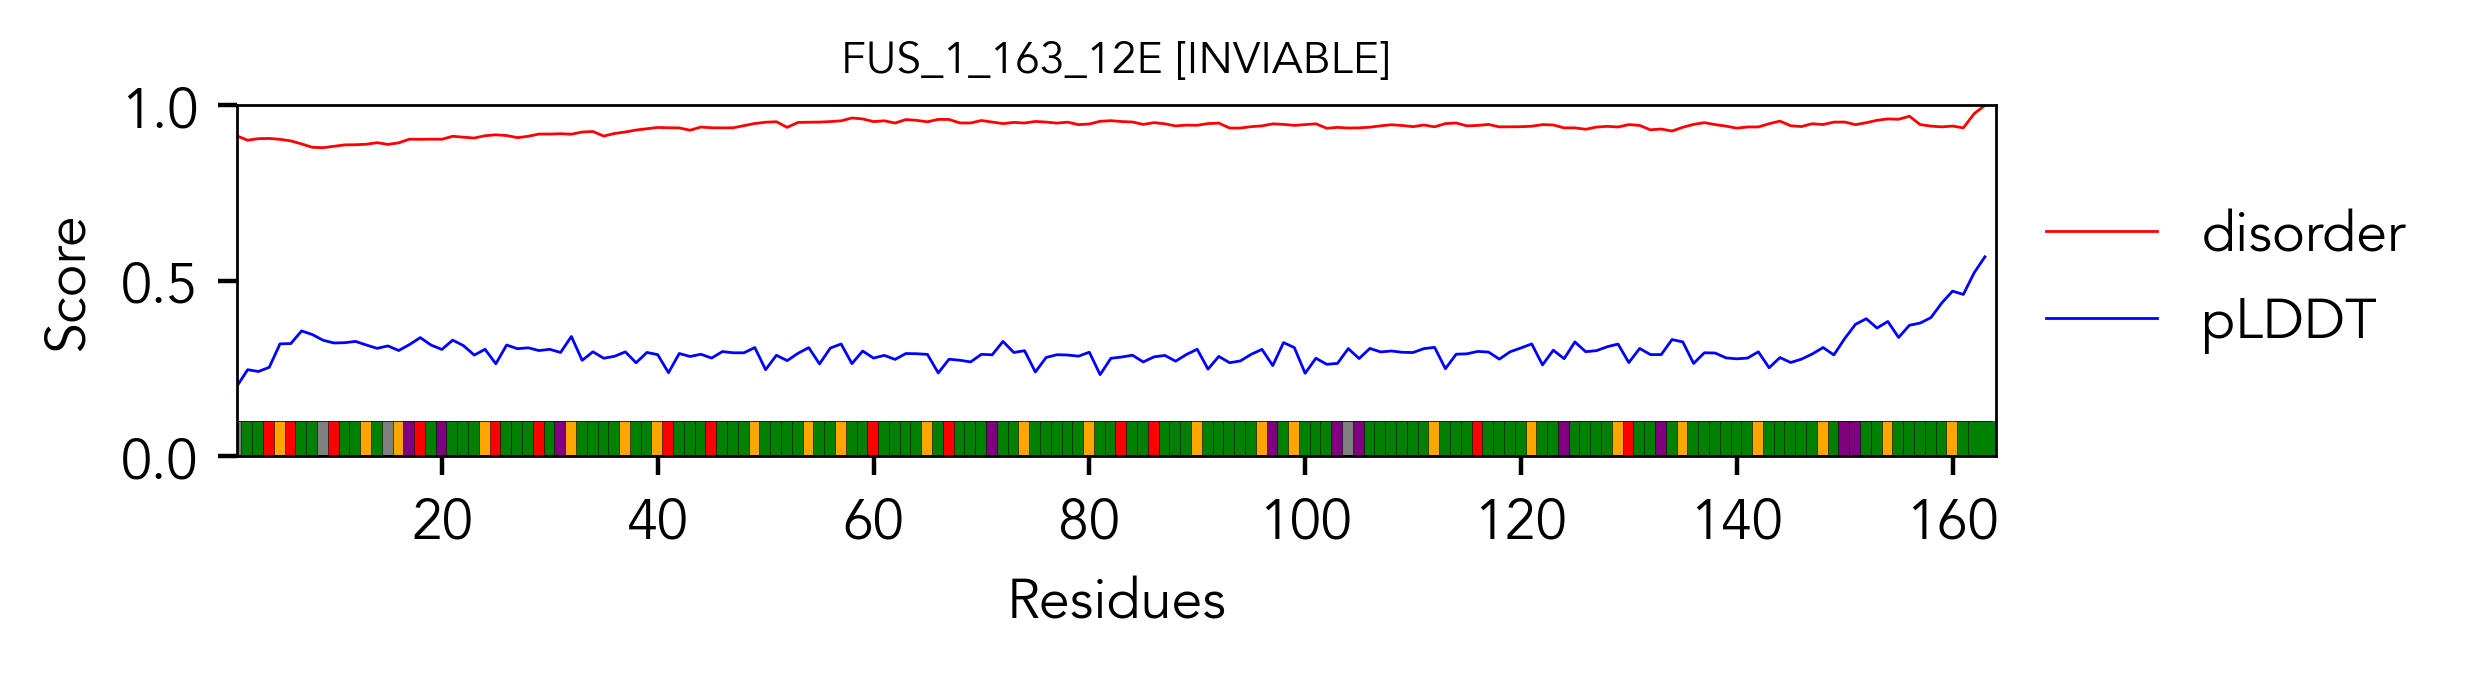

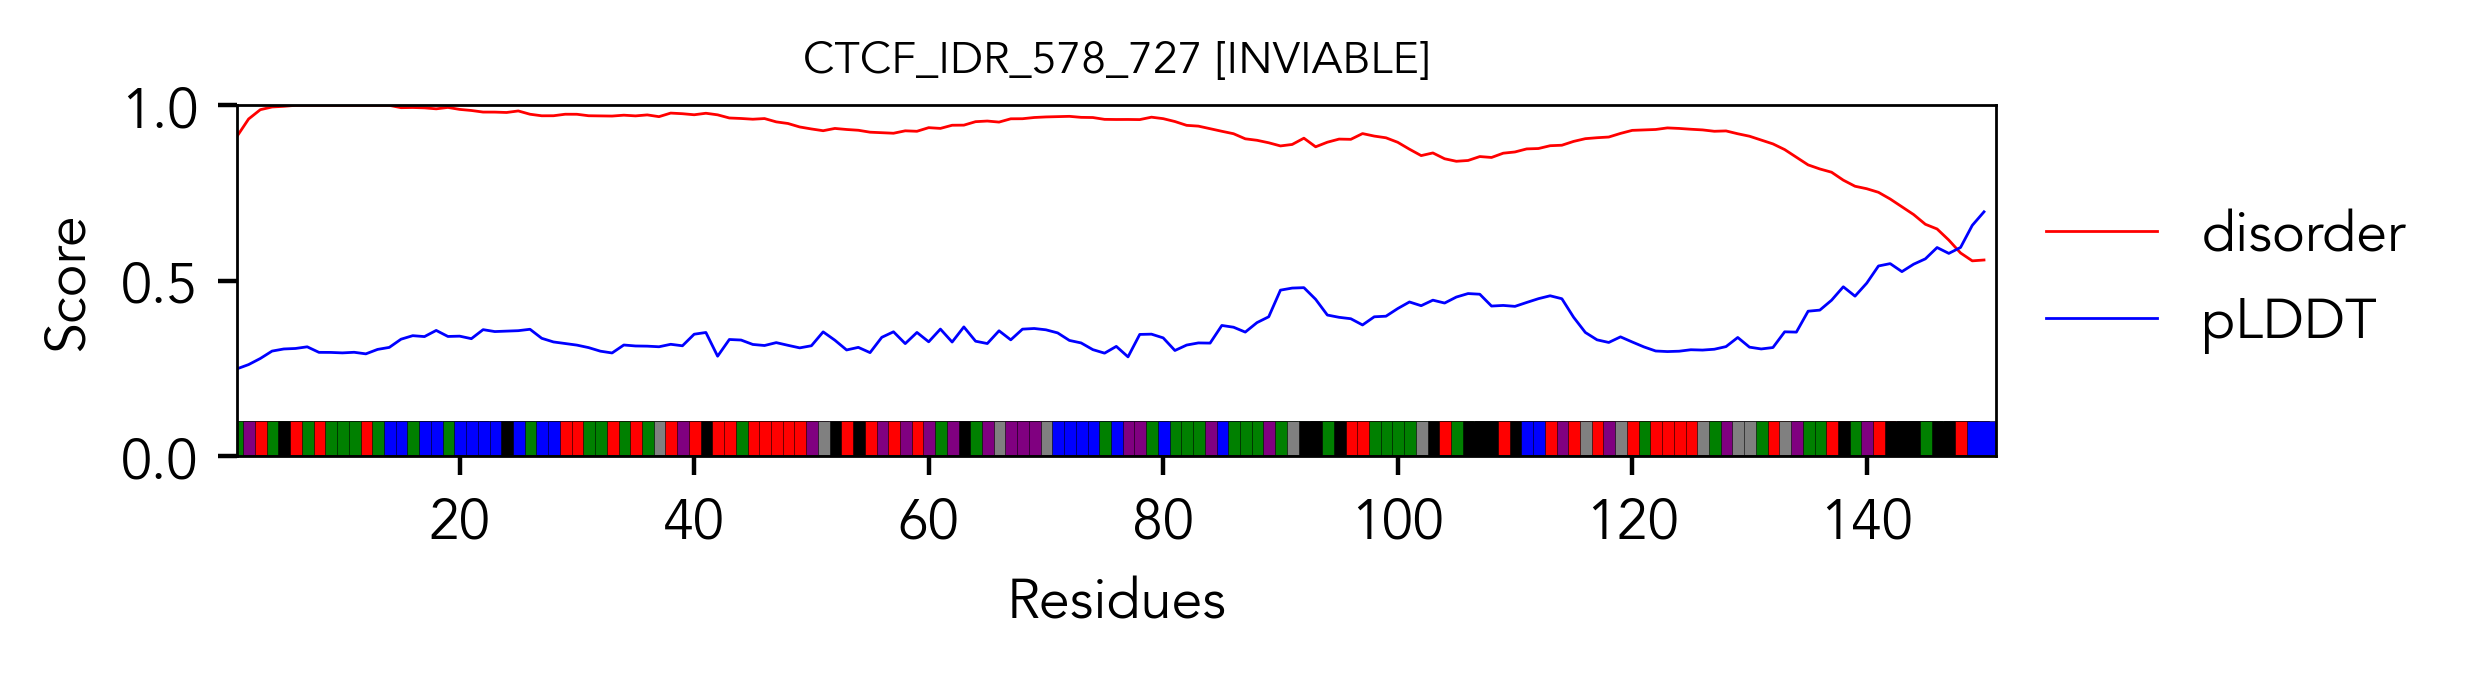

In [4]:
for i in seqs:
    
    sequence = seqs[i]
    

    name = i

    residue_idx = np.arange(1, len(sequence)+1)

    figure(num=None, figsize=(5.5, 1.8), dpi=200, facecolor='w', edgecolor='k')
    ax = plt.gca()
    
    dis = meta.predict_disorder(sequence)
    pLDDT = np.array(meta.predict_pLDDT(sequence))*0.01
    

    plt.plot(residue_idx, dis, 'r',linewidth=0.5,label='disorder')
    plt.plot(residue_idx, pLDDT, 'b',linewidth=0.5,label='pLDDT')

    for r in range(1,len(sequence)+1):
        plt.plot(r,0.05, 's',mec='k',mew=0.1,markerfacecolor=color_res[sequence[r-1]])
        
            
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.ylim([0,1])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.xlim([1,len(sequence)+1])
    plt.xlabel('Residues')
    plt.ylabel('Score')

               
    plt.title(name,fontsize=8)
    plt.tight_layout()
    plt.savefig(f'figures/disorder_profile_{name}.pdf')

 


In [5]:
ordered_names = list(seqs.keys())
all_data ={}
for i in seqs:
    all_data[i] = Protein(seqs[i])

In [6]:
negative = []
positive = []
hydrophobic = []
polar = []
names = []
for i in ordered_names:
    polar.append(all_data[i].fraction_polar)
    negative.append(all_data[i].fraction_negative)
    positive.append(all_data[i].fraction_positive)
    hydrophobic.append(all_data[i].amino_acid_fractions['L'] + all_data[i].amino_acid_fractions['I'] + all_data[i].amino_acid_fractions['V'] + all_data[i].amino_acid_fractions['M'] + all_data[i].fraction_aromatic )
    names.append(i[0:8])
    

neg_filler = []
pos_filler = []
hydro_filler = []

for i in negative:
    neg_filler.append(max(negative)-i)

for i in positive:
    pos_filler.append(max(positive)-i)

for i in hydrophobic:
    hydro_filler.append(max(hydrophobic)-i)
    
    


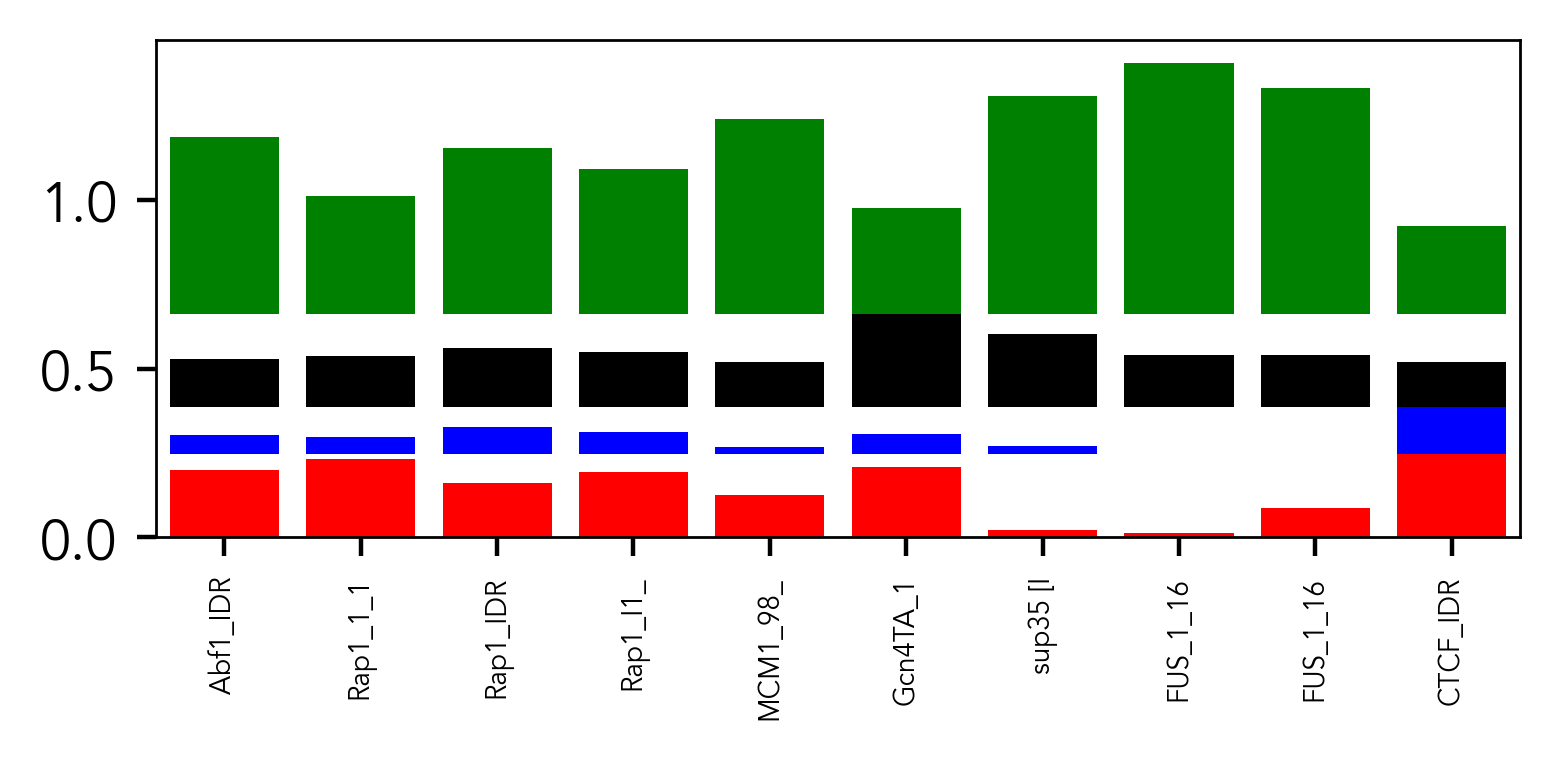

In [7]:
figure(num=None, figsize=(4, 2), dpi=200, facecolor='w', edgecolor='k')
ax = plt.gca()


found=False

# The position of the bars on the x-axis
r = np.arange(1,len(negative)+1)

idx=0
colors={}
colors[0] = 'red'
colors[1] = 'white'
colors[2] = 'blue'
colors[3] = 'white'
colors[4] = 'black'
colors[5] = 'white'
colors[6] = 'green'
running_total = np.array([0]*len(negative))

for bars in [negative, neg_filler, positive, pos_filler, hydrophobic, hydro_filler, polar]:

    if found:        
        plt.bar(r, bars, bottom=running_total, color=colors[idx], edgecolor='white', width=0.8,linewidth=0)
        
        
    else:
        plt.bar(r, bars, color=colors[idx], edgecolor='white', width=0.8, linewidth=0)
        found = True
        
    running_total = bars + running_total
    idx = idx + 1
    
plt.xticks(r,names, rotation=90, fontsize=5)
plt.tight_layout()
plt.xlim([0.5,10.5])
plt.savefig('figures/dead_seqs_composition.pdf')